# LVIT Calibration

##### Made by: Nick Schwartz
 Last Updated: 8/14/2023

In [1]:
pip install pyserial

Note: you may need to restart the kernel to use updated packages.


# Instructions

## Before Using this Program
#### First trial after connecting LVIT: "Test_VMeasurement"
Upload the Arduino file "Test_VMeasurement.ino" on the Arduino software. Wait to see if data is recorded, then Close out the program.
    Subsequent trials can ignore this step.

## First trial of each day: "LVIT Calibration Test"
Use python file "LVIT Calibration Test". Replace the port name with the port the LVIT is attached to. Replace the heights with the values of the calibration blocks. Run the program and place the corresponding block when prompted. Shut down the Kernel.  

#### Main Recording Program: "LVIT Test"
Use python file "LVIT Test". Replace the port name with the port the LVIT is attached to. Input y-intercept and slope from Calibration Test. Replace minutes with how many minutes will be used. 

In [2]:
import serial
import time
from datetime import datetime
import pdb
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Set Up

Set serialPortName as the port defined by the Arduino Software.

In [3]:
#Setting up the LVIT Acquisition
serialPortName = 'COM6'
serialPort = serial.Serial(
    port=serialPortName, baudrate=9600, bytesize=8, timeout=2, stopbits=serial.STOPBITS_ONE
)

#Setting up the heights. (abs difference between reference position and current position)
heights = [0, .05, .1, .15, .2, .25, .3]
names = ['No Block', '.05 in Cal Block', '.1 in Cal Block', '.15 in Cal Block', '.2 in Cal Block', '.25 in Cal Block', '.3 in Cal Block']

In [4]:
#Set Up for for loop

serialString = ""  # Used to hold data coming over UART

# time.time() returns seconds since Jan 1 1970 00:00 (Epoch Time)
time_start = time.time()

# Get a timestamp for the file name
now = datetime.now()
current_time = now.strftime("%m-%d-%y_%H-%M-%S")

#number of minutes to run LVIT
minutes = 1
duration = 60 * minutes

#Set Files list
files = []

# Main Loop

In [5]:
#Main Loop
files = []
for name in names:
    answer = input("Proceed with  {0}.\n Hit Enter to continue\n".format(name))
    if answer.lower() != "":
        break    
    
    serialString = ""  # Used to hold data coming over UART

    # time.time() returns seconds since Jan 1 1970 00:00 (Epoch Time)
    time_start = time.time()

    # Get a timestamp for the file name
    now = datetime.now()
    current_time = now.strftime("%m-%d-%y_%H-%M-%S")
    
    #Set Filename
    output_filename = "Calibration_Data_{0}.csv".format(name)
    
    time_last_log = time.time()
    time_now = time.time()
    time_elapsed = time_now - time_start
    
    f = open(output_filename, "w")
    
    while time_elapsed < duration + 1:
  
      time_now = time.time()
      time_elapsed = time_now - time_start

      # Wait until there is data waiting in the serial buffer
      if serialPort.in_waiting > 0:

        # Read data out of the buffer until a carraige return / new line is found
        serialString = serialPort.readline(16)
        serial_output = serialString.decode("Ascii")

        # If one second has elapsed since last time you logged output, then
        # it's time to log another weight value.
        time_since_last_log = time_now - time_last_log

        if time_since_last_log >= .45:
          # Reformat output from '  -23.8g\n' to '-23.8'
          weight = serial_output

          weight = weight.replace("g\n", "")


          # Print the contents of the serial data to the file
          try:
            output = "{0},{1}\n".format(round(time_elapsed, 3), weight)
            print(output)
            output = output.replace("Voltage: ","")
            output = output.replace("V","")
            f.write(output)
          except:
            pass
          time_last_log = time_now

    f.close()
    
    files.append(output_filename)
    
    f.close()


Proceed with  No Block.
 Hit Enter to continue

0.499,1.99413


1.012,1.98925


1.513,1.98925


2.012,1.98925


2.526,1.99413


3.029,1.98925


3.529,1.98925


4.03,1.99413


4.528,1.99902


5.045,1.98925


5.545,1.98925


6.048,1.99902


6.546,1.99413


7.053,1.99413


7.556,1.98925


8.064,1.98925


8.562,1.98925


9.064,1.98925


9.575,1.98925


10.078,1.98436


10.582,1.98925


11.079,1.99413


11.585,1.99413


12.089,1.98925


12.59,1.99413


13.094,1.98436


13.588,1.98925


14.09,1.99413


14.609,1.99413


15.099,1.99413


15.611,1.98925


16.117,1.98925


16.618,1.98925


17.114,1.98925


17.628,1.99413


18.131,1.99413


18.621,1.98925


19.132,1.99413


19.634,1.99413


20.135,1.99413


20.638,1.99902


21.142,1.99902


21.645,1.99413


22.151,1.98925


22.658,1.98925


23.16,1.99413


23.662,1.98925


24.163,1.98925


24.664,1.98925


25.165,1.98925


25.682,1.98925


26.184,1.98925


26.685,1.98925


27.186,1.99413


27.69,1.98925


28.193,1.98925


28.697,1.99413


29.196,

57.924,1.89150


58.44,1.89150


58.939,1.89150


59.439,1.89150


59.94,1.89150


60.441,1.89150


60.956,1.89638


Proceed with  .2 in Cal Block.
 Hit Enter to continue

0.517,1.85728


1.016,1.85239


1.524,1.86217


2.02,1.85728


2.53,1.86217


3.035,1.85728


3.537,1.86217


4.043,1.85728


4.533,1.85239


5.046,1.85239


5.55,1.85728


6.04,1.85728


6.549,1.85728


7.057,1.85728


7.557,1.85239


8.069,1.85239


8.56,1.85728


9.076,1.85728


9.58,1.85728


10.066,1.86217


10.583,1.85239


11.083,1.85728


11.582,1.85728


12.095,1.85728


12.599,1.85239


13.102,1.85728


13.602,1.85239


14.099,1.86217


14.614,1.85728


15.114,1.85728


15.616,1.86217


16.121,1.85728


16.619,1.85239


17.121,1.85239


17.632,1.85239


18.136,1.86217


18.633,1.85239


19.133,1.86217


19.633,1.85239


20.15,1.85728


20.649,1.85239


21.148,1.85728


21.649,1.85728


22.151,1.85728


22.667,1.85728


23.17,1.85728


23.665,1.85728


24.165,1.85728


24.682,1.85728


25.172,1.85239


25.68

In [6]:
print(files)

['Calibration_Data_No Block.csv', 'Calibration_Data_.05 in Cal Block.csv', 'Calibration_Data_.1 in Cal Block.csv', 'Calibration_Data_.15 in Cal Block.csv', 'Calibration_Data_.2 in Cal Block.csv', 'Calibration_Data_.25 in Cal Block.csv', 'Calibration_Data_.3 in Cal Block.csv']


# Data Reading

In [7]:
# Initialize lists for x values, y values, mean y values, and standard deviations
Time_list = []
Voltage_list = []
mean_V_list = []
mean_Voltage_list = []
std_V_list = []
V_rms_list = []
V_rms = []

# Loop through each CSV file and extract x and y values
for i, file in enumerate(files):
    print('{0}'.format(file))
    Time = []
    Voltage = []
    with open(file, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # skip header row
        for row in csv_reader:
            #print(row)
            if row == []:
                continue
            if row[0] == '' or row[1] == '' or row == '':
                continue 
            Time.append(float(row[0]))
            Voltage.append(float(row[1]))
    #Voltage = [i * 25.4 for i in Voltage]
    Time_list.append(Time)
    Voltage_list.append(Voltage)
    
    mean_V = np.mean(Voltage)
    mean_Voltage = [mean_V for j in range(len(Voltage))]
    
    #V_rms = [np.sqrt( (i - mean_V)**2 / len(Voltage) ) for i in Voltage]
    V_rms = [(i - mean_V)**2  for i in Voltage]
    V_rms = np.sqrt( np.sum(V_rms) / len(Voltage))
    
    V_rms_list.append(V_rms)

    mean_Voltage_list.append(mean_Voltage)
    
    std_V = np.std(Voltage)
    
    mean_V_list.append(mean_V)
    std_V_list.append(std_V)
    


print(mean_V_list)
print(V_rms_list)

Calibration_Data_No Block.csv
Calibration_Data_.05 in Cal Block.csv
Calibration_Data_.1 in Cal Block.csv
Calibration_Data_.15 in Cal Block.csv
Calibration_Data_.2 in Cal Block.csv
Calibration_Data_.25 in Cal Block.csv
Calibration_Data_.3 in Cal Block.csv
[1.9911207499999994, 1.9566605000000006, 1.9237947499999994, 1.8898285000000004, 1.8573207499999997, 1.820625, 1.7901199999999997]
[0.0030352433077926477, 0.0030482486365124685, 0.0031117101306998764, 0.002992581285445753, 0.0031876295169765657, 0.0030927075516447005, 0.0029227512723459465]


# Plots

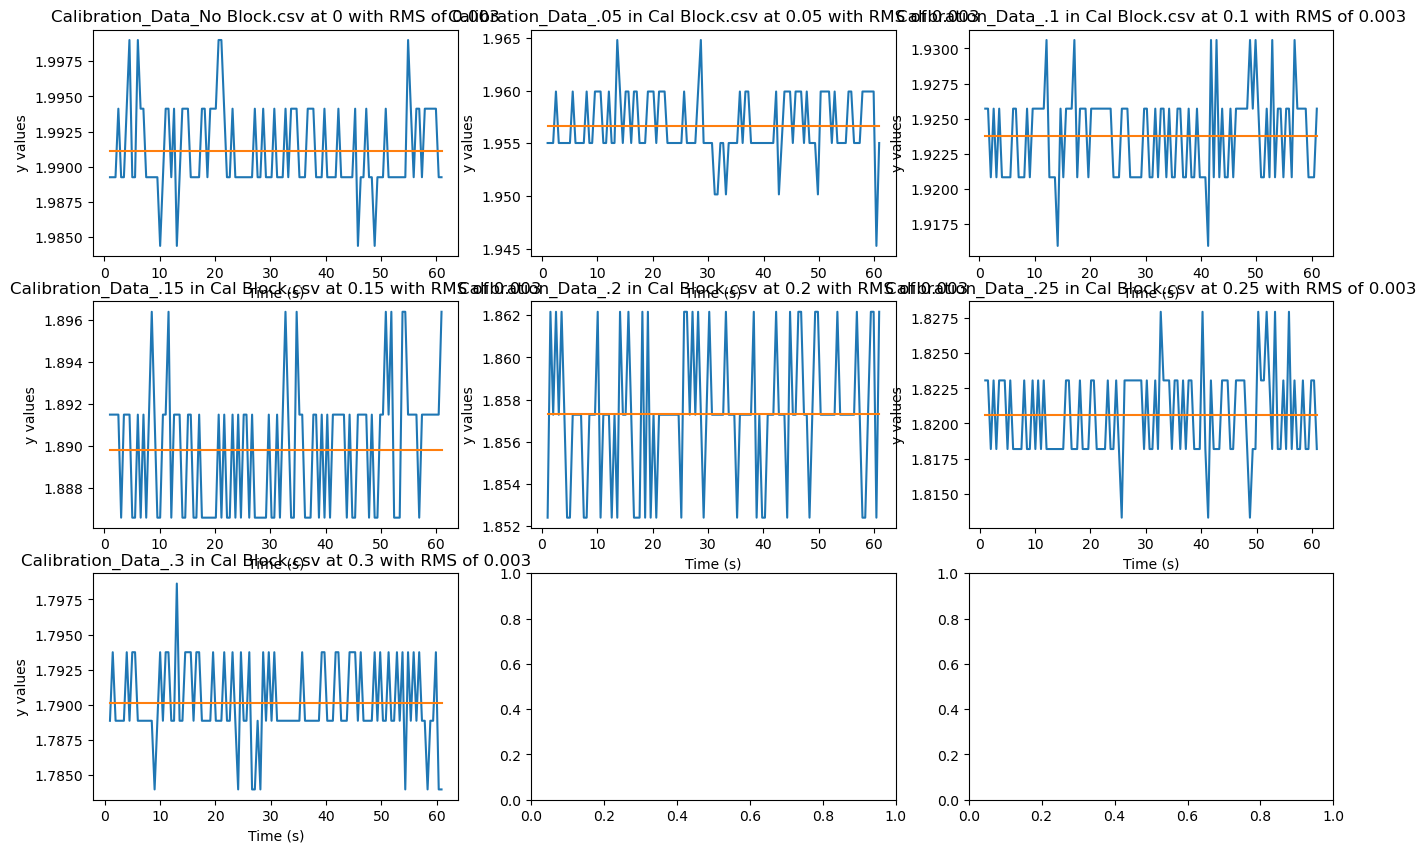

In [15]:
# Plot each graph on a subplot
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))
axs = axs.flatten()
for i in range(len(files)):
    axs[i].plot(Time_list[i], Voltage_list[i])
    axs[i].plot(Time_list[i], mean_Voltage_list[i])
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('y values')
    axs[i].set_title("{0} at {1} with RMS of {2}".format(files[i],round(heights[i],4),round(V_rms_list[i],3)))


7
7


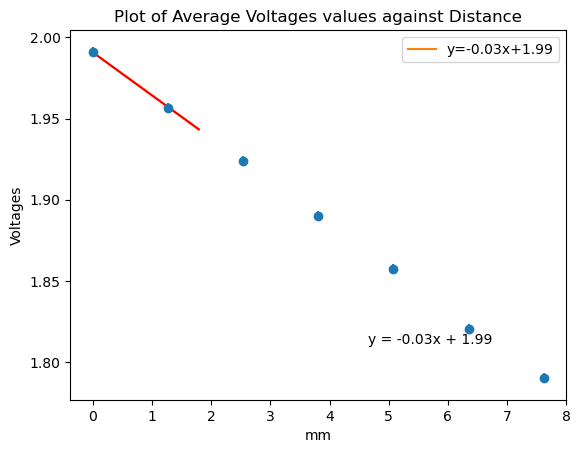

In [9]:
# Plot the average y values against the x values with error bars and trendline

#Known values in Inches that are converted into mm.
x_values = heights
x_values = [i * 25.4 for i in x_values]
y_values = mean_V_list

print(len(x_values))
print(len(y_values))
fig, ax = plt.subplots()
ax.errorbar(x_values, y_values, yerr=std_V_list, fmt='o')

# Fit a polynomial regression line to the data
coefficients = np.polyfit(x_values, y_values, 1)
polynomial = np.poly1d(coefficients)
x_range2 = np.linspace(0, y_values.pop(), 90)
y_range2 = polynomial(x_range2)

# Plot the regression line
ax.plot(x_range2, y_range2, label=f'y={polynomial.coeffs[0]:.2f}x+{polynomial.coeffs[1]:.2f}')
ax.plot(x_range2, y_range2, 'r')

# Add axis labels, a title, and a legend to the graph
ax.set_xlabel('mm')
ax.set_ylabel('Voltages')
ax.set_title('Plot of Average Voltages values against Distance')
ax.legend()

# Display the equation of the trendline on the graph
eq = f'y = {polynomial.coeffs[0]:.2f}x + {polynomial.coeffs[1]:.2f}'
ax.text(0.6, 0.15, eq, transform=ax.transAxes)

plt.show()


# Final Measurement

Copy the first number and paste onto the Slope area on the Test file, Copy the second number and paste onto the Intercept area on the Test file.

In [17]:
#Equation of the Best Fit Line
print("Slope: ",abs(round(polynomial.coeffs[0],3)))
print("Intercept: ",abs(round(polynomial.coeffs[1],3)))

Slope:  0.026
Intercept:  1.991
